## 基于聚类算法完成航空公司客户价值分析
- 特征工程
- K-means聚类
- RFM模型
- DBSCAN算法

#### 描述
信息时代的来临使得企业营销焦点从产品中心转变成客户中心。具体地，对不同的客户进行分类管理，给予不同类型的客户制定优化的个性化服务方案，采取不同的营销策略。将有限的营销资源集中于高价值的客户，实现企业利润最大化
1. 借助航空公司数据，对客户进行分类
2. 对不同类别的客户进行特征分析，比较不同类别客户的价值
3. 对不同价值的客户类别进行个性化服务，制定相应的营销策略

#### 思路
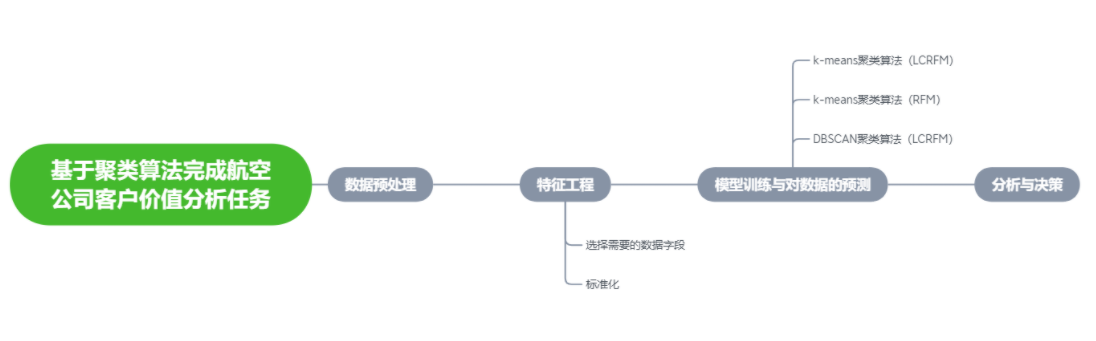

#### 数据
##### 数据集中字段含义
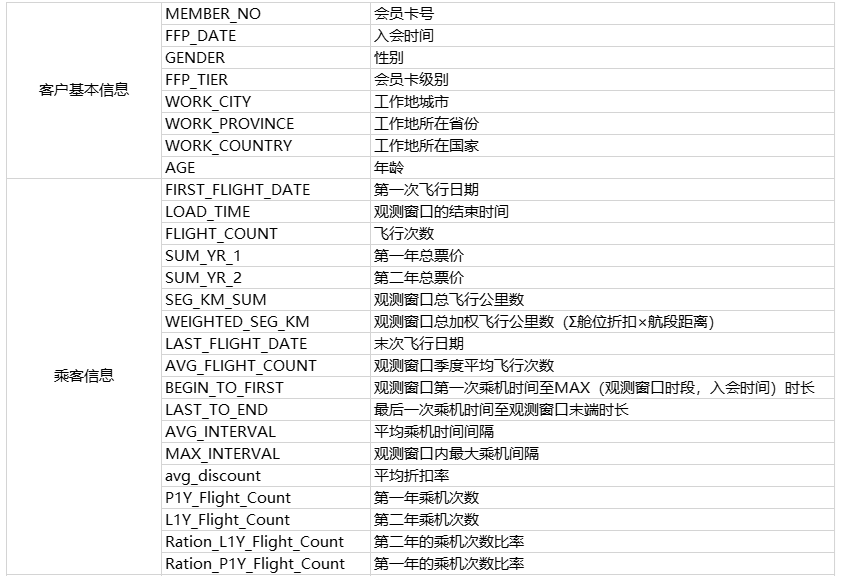
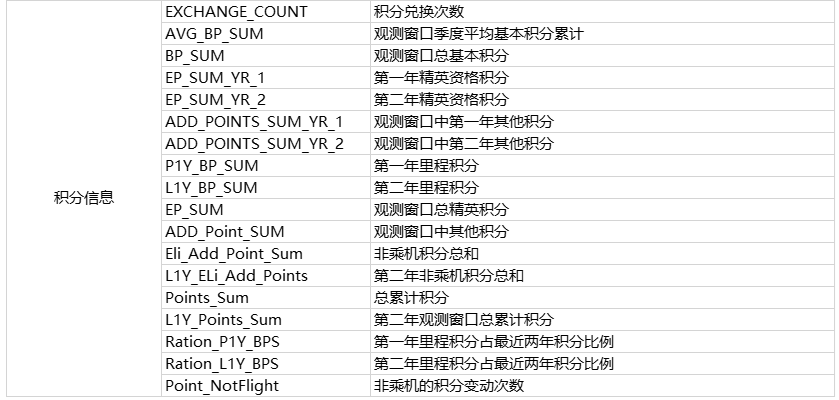

##### 数据预处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn.preprocessing
import sklearn.cluster

In [2]:
air_data_path = "./dataset/air_data.csv"
air_data = pd.read_csv(air_data_path)

In [3]:
air_data.shape

(62988, 44)

In [4]:
air_data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [5]:
air_data.dtypes

MEMBER_NO                    int64
FFP_DATE                    object
FIRST_FLIGHT_DATE           object
GENDER                      object
FFP_TIER                     int64
WORK_CITY                   object
WORK_PROVINCE               object
WORK_COUNTRY                object
AGE                        float64
LOAD_TIME                   object
FLIGHT_COUNT                 int64
BP_SUM                       int64
EP_SUM_YR_1                  int64
EP_SUM_YR_2                  int64
SUM_YR_1                   float64
SUM_YR_2                   float64
SEG_KM_SUM                   int64
WEIGHTED_SEG_KM            float64
LAST_FLIGHT_DATE            object
AVG_FLIGHT_COUNT           float64
AVG_BP_SUM                 float64
BEGIN_TO_FIRST               int64
LAST_TO_END                  int64
AVG_INTERVAL               float64
MAX_INTERVAL                 int64
ADD_POINTS_SUM_YR_1          int64
ADD_POINTS_SUM_YR_2          int64
EXCHANGE_COUNT               int64
avg_discount        

In [6]:
air_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


##### 判断重复值：是否有重复的会员ID

In [7]:
air_data['MEMBER_NO'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
62983    False
62984    False
62985    False
62986    False
62987    False
Name: MEMBER_NO, Length: 62988, dtype: bool

In [8]:
air_data[air_data['MEMBER_NO'].duplicated()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight


In [9]:
air_data.isna().any()

MEMBER_NO                  False
FFP_DATE                   False
FIRST_FLIGHT_DATE          False
GENDER                      True
FFP_TIER                   False
WORK_CITY                   True
WORK_PROVINCE               True
WORK_COUNTRY                True
AGE                         True
LOAD_TIME                  False
FLIGHT_COUNT               False
BP_SUM                     False
EP_SUM_YR_1                False
EP_SUM_YR_2                False
SUM_YR_1                    True
SUM_YR_2                    True
SEG_KM_SUM                 False
WEIGHTED_SEG_KM            False
LAST_FLIGHT_DATE           False
AVG_FLIGHT_COUNT           False
AVG_BP_SUM                 False
BEGIN_TO_FIRST             False
LAST_TO_END                False
AVG_INTERVAL               False
MAX_INTERVAL               False
ADD_POINTS_SUM_YR_1        False
ADD_POINTS_SUM_YR_2        False
EXCHANGE_COUNT             False
avg_discount               False
P1Y_Flight_Count           False
L1Y_Flight

In [10]:
air_data.isnull().any()

MEMBER_NO                  False
FFP_DATE                   False
FIRST_FLIGHT_DATE          False
GENDER                      True
FFP_TIER                   False
WORK_CITY                   True
WORK_PROVINCE               True
WORK_COUNTRY                True
AGE                         True
LOAD_TIME                  False
FLIGHT_COUNT               False
BP_SUM                     False
EP_SUM_YR_1                False
EP_SUM_YR_2                False
SUM_YR_1                    True
SUM_YR_2                    True
SEG_KM_SUM                 False
WEIGHTED_SEG_KM            False
LAST_FLIGHT_DATE           False
AVG_FLIGHT_COUNT           False
AVG_BP_SUM                 False
BEGIN_TO_FIRST             False
LAST_TO_END                False
AVG_INTERVAL               False
MAX_INTERVAL               False
ADD_POINTS_SUM_YR_1        False
ADD_POINTS_SUM_YR_2        False
EXCHANGE_COUNT             False
avg_discount               False
P1Y_Flight_Count           False
L1Y_Flight

In [11]:
boolean_filter = air_data['SUM_YR_1'].notnull() & air_data['SUM_YR_2'].notnull()

In [12]:
boolean_filter

0         True
1         True
2         True
3         True
4         True
         ...  
62983     True
62984     True
62985     True
62986     True
62987    False
Length: 62988, dtype: bool

In [13]:
air_data = air_data[boolean_filter]

In [14]:
filter1 = air_data['SUM_YR_1'] != 0
filter2 = air_data['SUM_YR_2'] != 0

In [15]:
air_data = air_data[filter1 | filter2]

In [16]:
air_data.shape

(62044, 44)

#### 特征工程

##### RFM模型
对于客户价值分析的一个经典模型是 RFM 模型。
- Recency: 最近消费时间间隔。
- Frequency: 客户消费频率。
- Monetary Value: 客户总消费金额。

##### 变体 - LRFMC 模型
- Length of Relationship: 客户关系时长，反映可能的活跃时长。
- Recency: 最近消费时间间隔，反映当前的活跃状态。
- Frequency: 客户消费频率，反映客户的忠诚度。
- Mileage: 客户总飞行里程，反映客户对乘机的依赖性。
- Coefficient of Discount: 客户所享受的平均折扣率，侧面反映客户价值高低。

In [17]:
load_time = datetime.datetime.strptime('2014/03/31','%Y/%m/%d')

In [18]:
load_time

datetime.datetime(2014, 3, 31, 0, 0)

In [19]:
ffp_dates = [datetime.datetime.strptime(ffp_date,'%Y/%m/%d') for ffp_date in air_data['FFP_DATE']]

In [20]:
length_of_relationship  = [(load_time-ffp_date).days for ffp_date in ffp_dates]

In [21]:
air_data['LEN_REL'] = length_of_relationship

##### 移除非重要列， 只保留LRFMC模型所需的属性

In [22]:
features = ['LEN_REL','FLIGHT_COUNT','avg_discount','SEG_KM_SUM','LAST_TO_END']
data = air_data[features]

features = ['L','F','C','M','R']
data.columns = features

In [23]:
data.shape

(62044, 5)

In [24]:
data.head()

,L,F,C,M,R
0,2706,210,0.961639,580717,1
1,2597,140,1.252314,293678,7
2,2615,135,1.254676,283712,11
3,2047,23,1.090870,281336,97
4,1816,152,0.970658,309928,5


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
L,62044.0,1488.691090,847.880920,365.000000,735.000000,1278.000000,2182.000000,3437.0
F,62044.0,11.971359,14.110619,2.000000,3.000000,7.000000,15.000000,213.0
C,62044.0,0.722180,0.184833,0.136017,0.613085,0.712162,0.809293,1.5
M,62044.0,17321.694749,21052.728111,368.000000,4874.000000,10200.000000,21522.500000,580717.0
R,62044.0,172.532703,181.526164,1.000000,29.000000,105.000000,260.000000,731.0


### 标准化
让不同属性的取值范围一致，即数据的标准化。标准化方法有极大极小标准化、标准差标准化等方法。
- 对特征标准化，使得各特征的均值为0、方差为1

In [26]:
((data -data.mean(axis=0)) /data.std(axis=0)).describe().T

,count,mean,std,min,25%,50%,75%,max
L,62044.0,1.117739e-16,1.0,-1.325294,-0.888911,-0.248491,0.817696,2.297857
F,62044.0,3.664717e-17,1.0,-0.706656,-0.635788,-0.352313,0.214636,14.246621
C,62044.0,4.251071e-16,1.0,-3.171310,-0.590233,-0.054199,0.471304,4.208225
M,62044.0,-5.863547e-17,1.0,-0.805297,-0.591263,-0.338279,0.199537,26.761154
R,62044.0,1.465887e-16,1.0,-0.944948,-0.790700,-0.372027,0.481844,3.076511


In [27]:
ss = sklearn.preprocessing.StandardScaler(with_mean=True,with_std=True)

In [28]:
data = ss.fit_transform(data)

In [29]:
data

array([[ 1.43571897, 14.03412875,  1.29555058, 26.76136996, -0.94495516],
       [ 1.30716214,  9.07328567,  2.86819902, 13.1269701 , -0.9119018 ],
       [ 1.32839171,  8.71893974,  2.88097321, 12.65358345, -0.88986623],
       ...,
       [-0.14942206, -0.70666211, -2.68990622, -0.77233818, -0.73561725],
       [-1.20618274, -0.70666211, -2.55464809, -0.77984321,  1.6056619 ],
       [-0.47965977, -0.70666211, -2.39233833, -0.78668323,  0.60304353]])

In [30]:
data = pd.DataFrame(data,columns=features)

In [31]:
data.head()

,L,F,C,M,R
0,1.435719,14.034129,1.295551,26.761370,-0.944955
1,1.307162,9.073286,2.868199,13.126970,-0.911902
2,1.328392,8.718940,2.880973,12.653583,-0.889866
3,0.658481,0.781591,1.994730,12.540723,-0.416102
4,0.386035,9.923716,1.344346,13.898848,-0.922920


In [32]:
data_db = data.copy()

In [33]:
data_db.describe().T

,count,mean,std,min,25%,50%,75%,max
L,62044.0,1.246004e-16,1.000008,-1.325304,-0.888919,-0.248493,0.817703,2.297875
F,62044.0,5.863547e-17,1.000008,-0.706662,-0.635793,-0.352316,0.214637,14.246736
C,62044.0,3.957894e-16,1.000008,-3.171335,-0.590238,-0.054200,0.471308,4.208258
M,62044.0,-1.026121e-16,1.000008,-0.805303,-0.591268,-0.338282,0.199539,26.761370
R,62044.0,4.397660e-17,1.000008,-0.944955,-0.790706,-0.372030,0.481848,3.076536


### 模型训练与 数据的预测
将客户群体细分为重要保持客户、重要发展客户、重要挽留客户、一般客户、低价值客户五类

#### K-means聚类算法
- 目标是把 $n$ 个观测样本划分成 $k$ 个群体（cluster），每个群体都有一个中心（mean）。
- 每个样本仅属于其中一个群体，即与这个样本距离最近的中心的群体。
- 符号: $S_{i}$ 是一个群体, $m_{i}$ 是群体 $S_{i}$ 里的样本的中心, $x_{i}$ 是一个样本点。
- Assignment step (expectation step): 把每个样本分配给距离最近的中心的群体
- Update step (maximization step): 根据当前的样本及其所属群体，重新计算各群体的中心

In [34]:
num_clusters = 5  # 设置类别为5
km = sklearn.cluster.KMeans(n_clusters=num_clusters, n_jobs=4)  #模型加载
km.fit(data) # 模型训练

c:\users\ysilhouette\documents\pyenv\py3.6.5\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


KMeans(n_clusters=5, n_jobs=4)

In [35]:
# 查看模型学习出来的5个群体的中心， 以及5哥群体所包含的样本个数
r1 = pd.Series(km.labels_).value_counts()
r2 = pd.DataFrame(km.cluster_centers_)
r = pd.concat([r2,r1],axis=1)
r.columns = list(data.columns) + ['counts']
r

,L,F,C,M,R,counts
0,0.062308,-0.224600,2.211485,-0.227203,-0.000133,4131
1,-0.315966,-0.574020,-0.173669,-0.536715,1.686711,12122
2,0.484677,2.476991,0.306870,2.419714,-0.799004,5346
3,-0.700122,-0.161210,-0.251153,-0.161457,-0.414859,24701
4,1.160240,-0.089820,-0.156075,-0.097957,-0.374991,15744


In [36]:
# 查看模型对每个样本预测的群体标签
km.labels_

array([2, 2, 2, ..., 3, 1, 1])

#### 尝试使用RFM模型

In [37]:
data_rfm = data[['R','F','M']]
data_rfm.head()

,R,F,M
0,-0.944955,14.034129,26.761370
1,-0.911902,9.073286,13.126970
2,-0.889866,8.718940,12.653583
3,-0.416102,0.781591,12.540723
4,-0.922920,9.923716,13.898848
